In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base=automap_base()

# reflect the tables
Base.prepare(engine,reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Climate Analysis

In [10]:
inspector= inspect(engine)
for x in inspector.get_columns("measurement"):
    print(x["name"])

id
station
date
prcp
tobs


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
engine.execute("SELECT * FROM measurement LIMIT 5").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [12]:
# Calculate the date 1 year ago from the last data point in the database
dates=session.query(Measurement.date).all()
date_last= dates[-1]
date_last

('2017-08-23')

In [13]:
query_date=dt.date(2017,8,23)-dt.timedelta(days=365)

In [14]:
# Perform a query to retrieve the data and precipitation scores
scores=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=query_date).all()

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp=pd.DataFrame(scores)


In [16]:
# Sort the dataframe by date
prcp=prcp.sort_index(ascending=True)
prcp["date"]=pd.to_datetime(prcp["date"])
prcp.dtypes

date    datetime64[ns]
prcp           float64
dtype: object

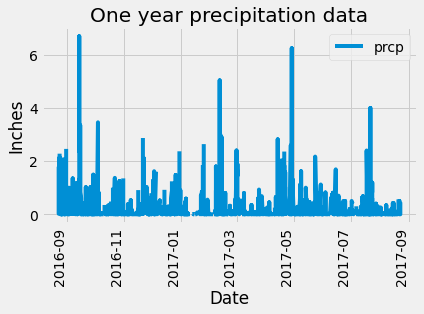

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp.plot(x="date", y="prcp")
plt.title("One year precipitation data")
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
mean=prcp["prcp"].mean()
median=prcp["prcp"].median()
mode=prcp["prcp"].mode()
print(f"The last year precipations mean is {mean}, the median is {median} and the mode is {mode}")

The last year precipations mean is 0.17727857496288996, the median is 0.02 and the mode is 0    0.0
dtype: float64


In [20]:
# Design a query to show how many stations are available in this dataset?
session.query(Measurement).group_by(Measurement.station).count()

9

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
engine.execute("SELECT station, COUNT(station) AS 'st' FROM measurement GROUP BY station ORDER BY COUNT(station) DESC").fetchall()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
engine.execute("SELECT station, tobs FROM measurement WHERE station='USC00519281' ORDER BY tobs LIMIT 1").fetchall()


[('USC00519281', 54.0)]

In [23]:
# highest temperature recorded, 
engine.execute("SELECT station, tobs FROM measurement WHERE station='USC00519281' ORDER BY tobs DESC LIMIT 1").fetchall()

[('USC00519281', 85.0)]

In [24]:
#and average temperature of the most active station?
session.query(func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()

[(71.66378066378067)]

In [25]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
engine.execute("SELECT station, COUNT(tobs) AS 'tb' FROM measurement GROUP BY station ORDER BY COUNT(tobs) DESC").fetchall()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [26]:
temperature=engine.execute("SELECT tobs FROM measurement WHERE station='USC00519281' ORDER BY tobs").fetchall()

In [27]:
temperature_df=pd.DataFrame(temperature)

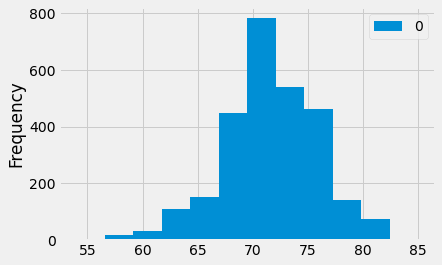

In [28]:
temperature_df.plot(kind='hist',bins=12)

## Bonus Challenge Assignment

In [11]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
